In [4]:
import pandas as pd
from google.colab import files
uploaded = files.upload()  # Choose the correct .csv
df = pd.read_csv('nba_traditional_stats_2020_2025_all.csv')
df['Season_Type'] = df['Season_Type'].str.replace('%20', ' ')  # just in case

df_rs = df[df['Season_Type'] == 'Regular Season']

Saving nba_traditional_stats_2020_2025_all.csv to nba_traditional_stats_2020_2025_all.csv


In [5]:
df_rs.to_csv('nba_traditional_RS_2020_2025.csv', index=False)

In [6]:
from google.colab import files
files.download('nba_traditional_RS_2020_2025.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Regular Season data
df = pd.read_csv('nba_traditional_RS_2020_2025.csv')

# Focus on 2024–25 season
df_2024 = df[df['Year'] == '2024-25'].copy()

In [8]:
# Avoid divide-by-zero and filter for volume shooters
df_2024['FGA'] = pd.to_numeric(df_2024['FGA'], errors='coerce')
df_2024['FTA'] = pd.to_numeric(df_2024['FTA'], errors='coerce')

df_2024 = df_2024[df_2024['FGA'] > 500]

# Calculate scoring efficiency
df_2024['Scoring_Efficiency'] = df_2024['PTS'] / (df_2024['FGA'] + 0.44 * df_2024['FTA'])

# Get Top 10 Efficient Scorers
top_eff = df_2024.sort_values(by='Scoring_Efficiency', ascending=False).head(10)

/tmp/ipython-input-9-2347815422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Scoring_Efficiency', y='PLAYER', data=top_eff, palette='coolwarm')


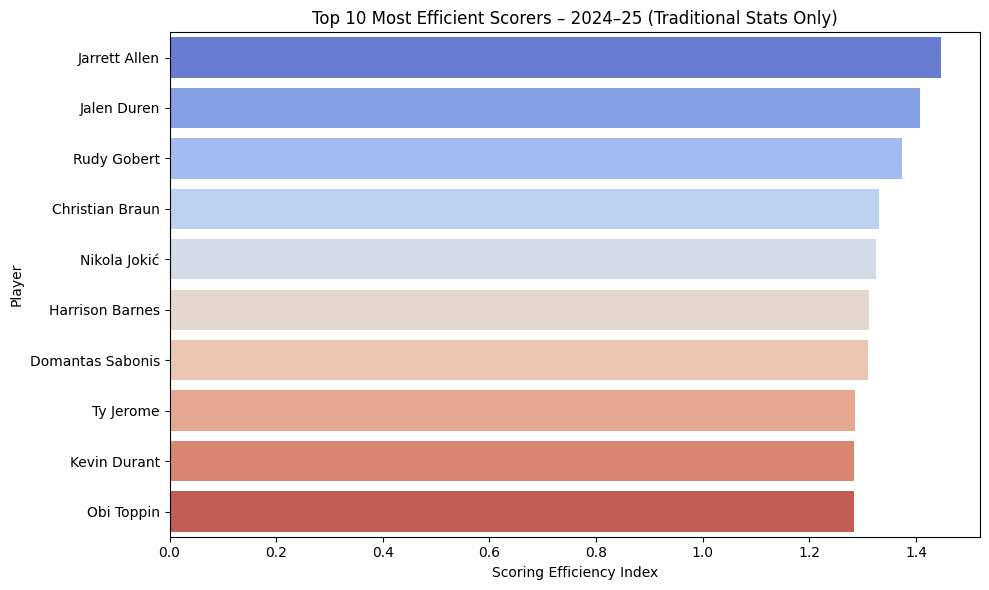

In [9]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Scoring_Efficiency', y='PLAYER', data=top_eff, palette='coolwarm')
plt.title('Top 10 Most Efficient Scorers – 2024–25 (Traditional Stats Only)')
plt.xlabel('Scoring Efficiency Index')
plt.ylabel('Player')
plt.tight_layout()
plt.show()